# Visualisations – Données `images_train_labeled.csv`

Ce notebook contient toutes les visualisations réalisées à partir du fichier fusionné `images_train_labeled.csv` uniquement.

In [5]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Chargement du fichier
df = pd.read_csv('images_train_labeled.csv')

# Conversion de la date
if 'date_upload' in df.columns:
    df['date_upload'] = pd.to_datetime(df['date_upload'], errors='coerce')

# Nettoyage des labels pour uniformisation
df['etat_annot'] = df['etat_annot'].replace({'dirty': 'Pleine', 'clean': 'Vide'})
df['classification_auto'] = df['classification_auto'].replace({'dirty': 'Pleine', 'clean': 'Vide'})

df.head()


,id,fichier_nom,etat_annot,classification_auto,date_upload,latitude,longitude,quartier,ville,code_postal,...,largeur,moyenne_rouge,moyenne_vert,moyenne_bleu,contraste,histogramme,contours_detectes,luminance_moyenne,dark_pixel_ratio,texture_score
0,673,00204_00.jpg,Vide,Vide,2025-07-09 09:17:43.715614,48.898743,2.357512,Non défini,Paris,NaN,...,600,122,127,121,255.0,"{""r"": [110.0, 28.0, 27.0, 20.0, 38.0, 36.0, 58...",True,125.87,0.1051,3617.76
1,674,00207_03.jpg,Vide,Vide,2025-07-09 09:17:43.715614,48.856966,2.327778,Non défini,Paris,NaN,...,600,130,132,129,255.0,"{""r"": [8.0, 1.0, 3.0, 7.0, 12.0, 6.0, 14.0, 12...",True,131.73,0.0313,1131.67
2,675,00217_05.jpg,Vide,Pleine,2025-07-09 09:17:43.715614,48.862469,2.339340,Non défini,Paris,NaN,...,600,112,117,106,255.0,"{""r"": [102.0, 28.0, 31.0, 37.0, 49.0, 55.0, 87...",True,115.49,0.1320,2567.11
3,676,00517_04.jpg,Vide,Pleine,2025-07-09 09:17:43.715614,48.820428,2.288079,Non défini,Paris,NaN,...,600,112,114,108,255.0,"{""r"": [70.0, 20.0, 36.0, 47.0, 58.0, 64.0, 94....",True,113.80,0.1372,1346.20
4,677,00543_02.jpg,Vide,non déterminé,2025-07-09 09:17:43.715614,48.821686,2.348185,Non défini,Paris,NaN,...,600,117,117,116,255.0,"{""r"": [30.0, 13.0, 14.0, 19.0, 18.0, 39.0, 51....",True,117.17,0.0774,2994.93


## 1. Évolution temporelle des uploads

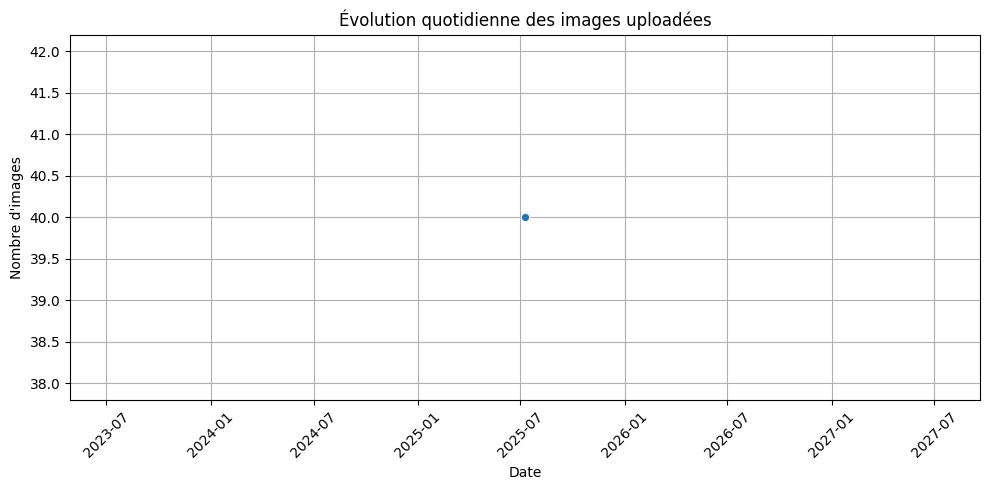

In [6]:

uploads_per_day = df['date_upload'].dt.date.value_counts().sort_index()
plt.figure(figsize=(10,5))
sns.lineplot(x=uploads_per_day.index, y=uploads_per_day.values, marker='o')
plt.title('Évolution quotidienne des images uploadées')
plt.xlabel('Date'); plt.ylabel("Nombre d'images")
plt.xticks(rotation=45); plt.grid(True); plt.tight_layout()


## 2. Répartition des annotations manuelles

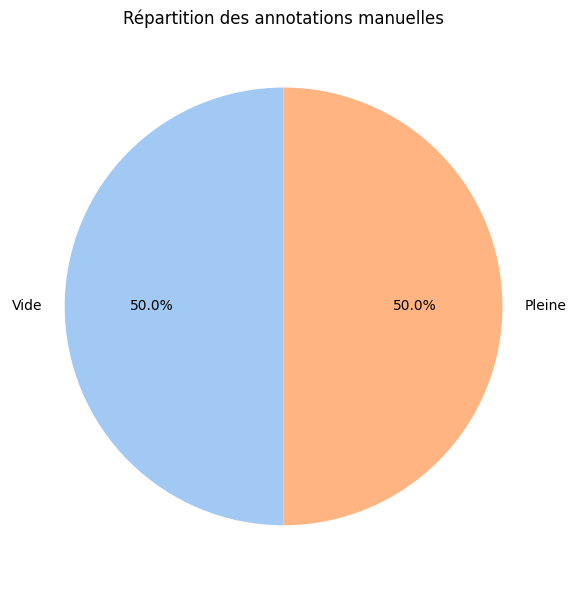

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Nettoyage si nécessaire : renommage
df["etat_annot"] = df["etat_annot"].replace({"dirty": "Pleine", "clean": "Vide"})

# Comptage des catégories
counts = df["etat_annot"].value_counts()

# Tracé du camembert
plt.figure(figsize=(6, 6))
colors = sns.color_palette("pastel")
plt.pie(counts, labels=counts.index, autopct="%1.1f%%", startangle=90, colors=colors)
plt.title("Répartition des annotations manuelles")
plt.tight_layout()
plt.show()


## 3. Répartition des annotations automatiques

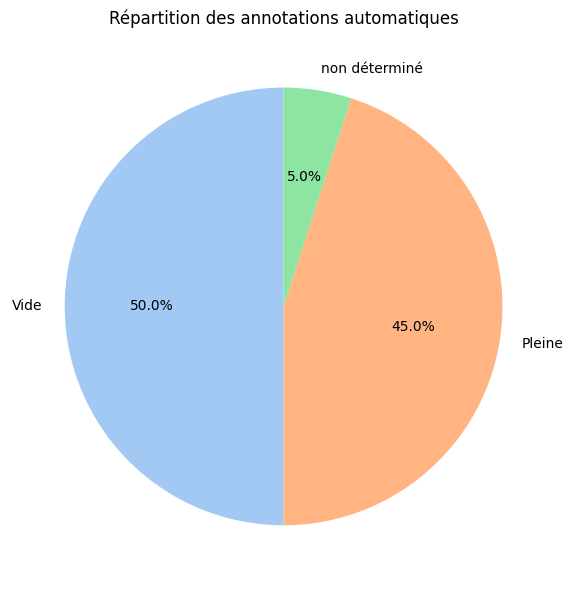

In [8]:
# Nettoyage si nécessaire : renommage
df["classification_auto"] = df["classification_auto"].replace({"dirty": "Pleine", "clean": "Vide"})

# Comptage des catégories
counts_auto = df["classification_auto"].value_counts()

# Tracé du camembert
plt.figure(figsize=(6, 6))
colors = sns.color_palette("pastel")
plt.pie(counts_auto, labels=counts_auto.index, autopct="%1.1f%%", startangle=90, colors=colors)
plt.title("Répartition des annotations automatiques")
plt.tight_layout()
plt.show()


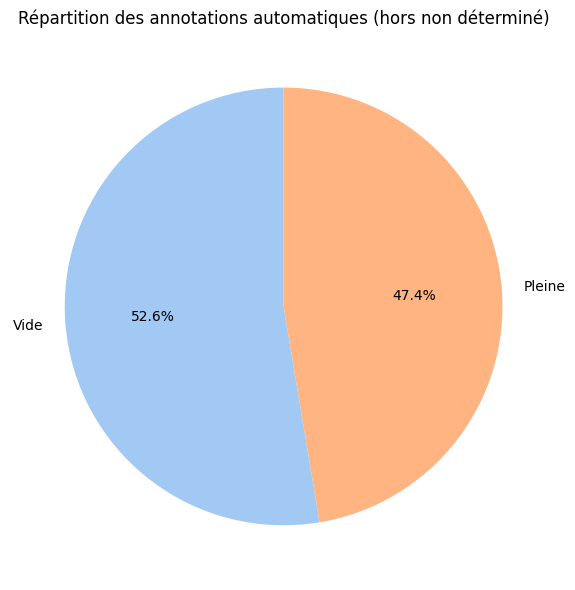

In [9]:
# Nettoyage : renommage et suppression des indéterminés
df["classification_auto"] = df["classification_auto"].replace({"dirty": "Pleine", "clean": "Vide"})
df_auto_clean = df[df["classification_auto"].isin(["Pleine", "Vide"])]

# Camembert
counts_auto = df_auto_clean["classification_auto"].value_counts()
plt.figure(figsize=(6, 6))
colors = sns.color_palette("pastel")
plt.pie(counts_auto, labels=counts_auto.index, autopct="%1.1f%%", startangle=90, colors=colors)
plt.title("Répartition des annotations automatiques (hors non déterminé)")
plt.tight_layout()
plt.show()


## 4. Comparaison manuel vs automatique

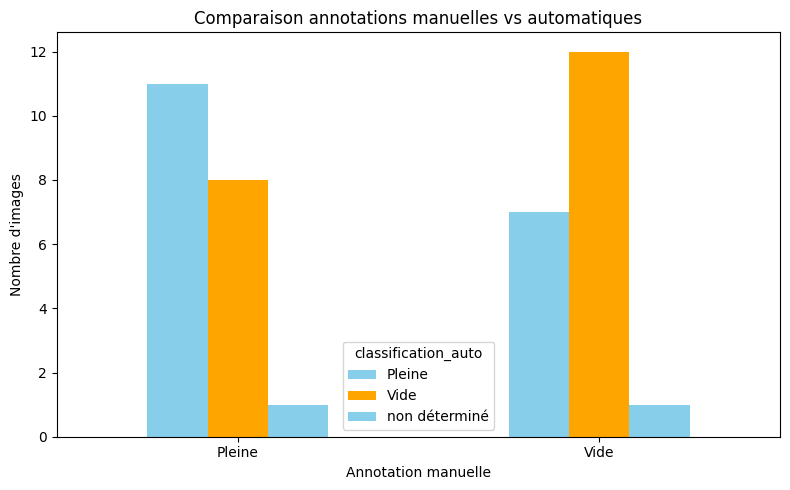

In [10]:

comp = df.groupby(['etat_annot','classification_auto']).size().unstack(fill_value=0)
comp.plot(kind='bar', figsize=(8,5), color=['skyblue','orange'])
plt.title('Comparaison annotations manuelles vs automatiques')
plt.xlabel('Annotation manuelle'); plt.ylabel("Nombre d'images")
plt.xticks(rotation=0); plt.tight_layout()


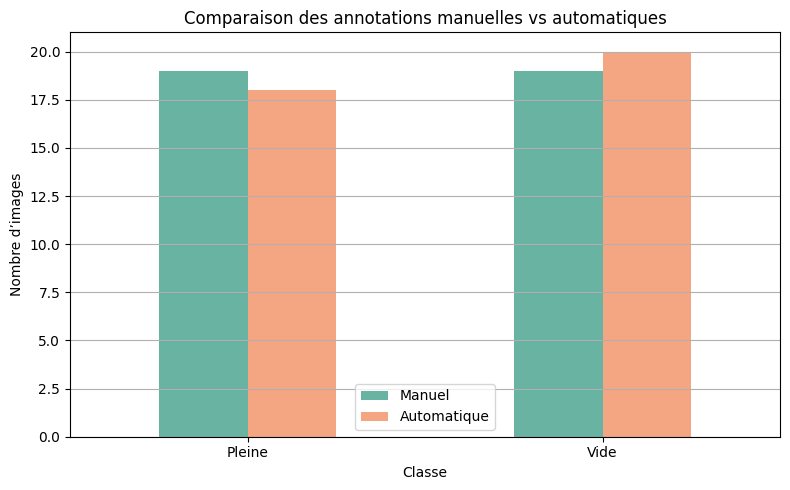

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrage des lignes valides (ni manuel ni auto n'est "non déterminé")
df_compar = df[
    df["etat_annot"].isin(["Pleine", "Vide"]) & 
    df["classification_auto"].isin(["Pleine", "Vide"])
]

# Comptage manuel
counts_manuel = df_compar["etat_annot"].value_counts().sort_index()

# Comptage auto
counts_auto = df_compar["classification_auto"].value_counts().sort_index()

# Création du DataFrame groupé
df_barres = pd.DataFrame({
    "Manuel": counts_manuel,
    "Automatique": counts_auto
})

# Tracé
df_barres.plot(kind="bar", figsize=(8, 5), color=["#69b3a2", "#f4a582"])
plt.title("Comparaison des annotations manuelles vs automatiques")
plt.xlabel("Classe")
plt.ylabel("Nombre d’images")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.tight_layout()
plt.show()


## 5. Matrice de confusion

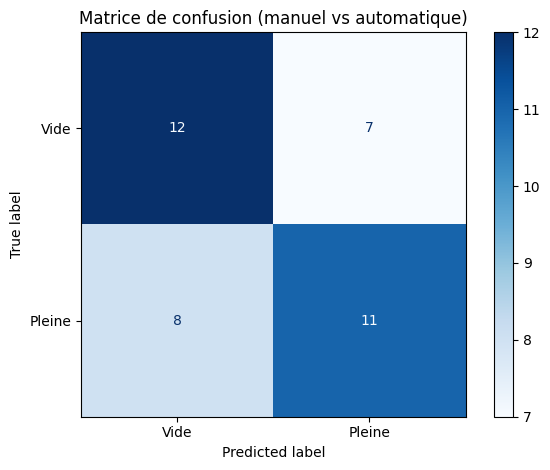

🔢 Précision globale (Accuracy) : 60.53%

📋 Rapport de classification :
              precision    recall  f1-score   support

        Vide       0.61      0.58      0.59        19
      Pleine       0.60      0.63      0.62        19

    accuracy                           0.61        38
   macro avg       0.61      0.61      0.60        38
weighted avg       0.61      0.61      0.60        38



In [12]:
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    classification_report
)

# Filtrage : on garde seulement les lignes valides
df_eval = df[
    df["etat_annot"].isin(["Pleine", "Vide"]) & 
    df["classification_auto"].isin(["Pleine", "Vide"])
]

# Labels dans l’ordre
labels = ["Vide", "Pleine"]

# Matrice de confusion
cm = confusion_matrix(df_eval["etat_annot"], df_eval["classification_auto"], labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap="Blues")
plt.title("Matrice de confusion (manuel vs automatique)")
plt.tight_layout()
plt.show()

# Accuracy globale
accuracy = accuracy_score(df_eval["etat_annot"], df_eval["classification_auto"])
print(f"🔢 Précision globale (Accuracy) : {accuracy:.2%}")

# Rapport complet (Precision, Recall, F1-score)
print("\n📋 Rapport de classification :")
print(classification_report(
    df_eval["etat_annot"], 
    df_eval["classification_auto"], 
    target_names=labels
))


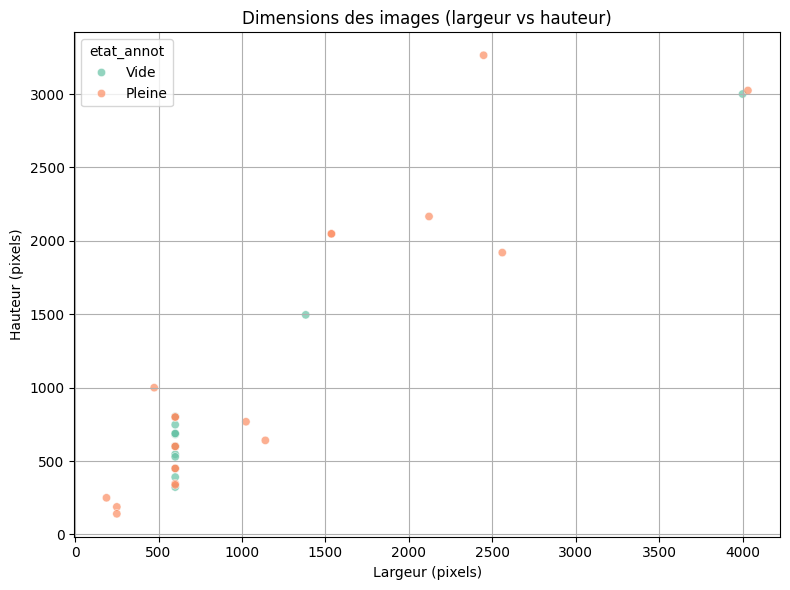

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Suppression des valeurs nulles
df_dims = df.dropna(subset=["largeur", "hauteur"])

# Tracé scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_dims, x="largeur", y="hauteur", hue="etat_annot", palette="Set2", alpha=0.7)
plt.title("Dimensions des images (largeur vs hauteur)")
plt.xlabel("Largeur (pixels)")
plt.ylabel("Hauteur (pixels)")
plt.grid(True)
plt.tight_layout()
plt.show()


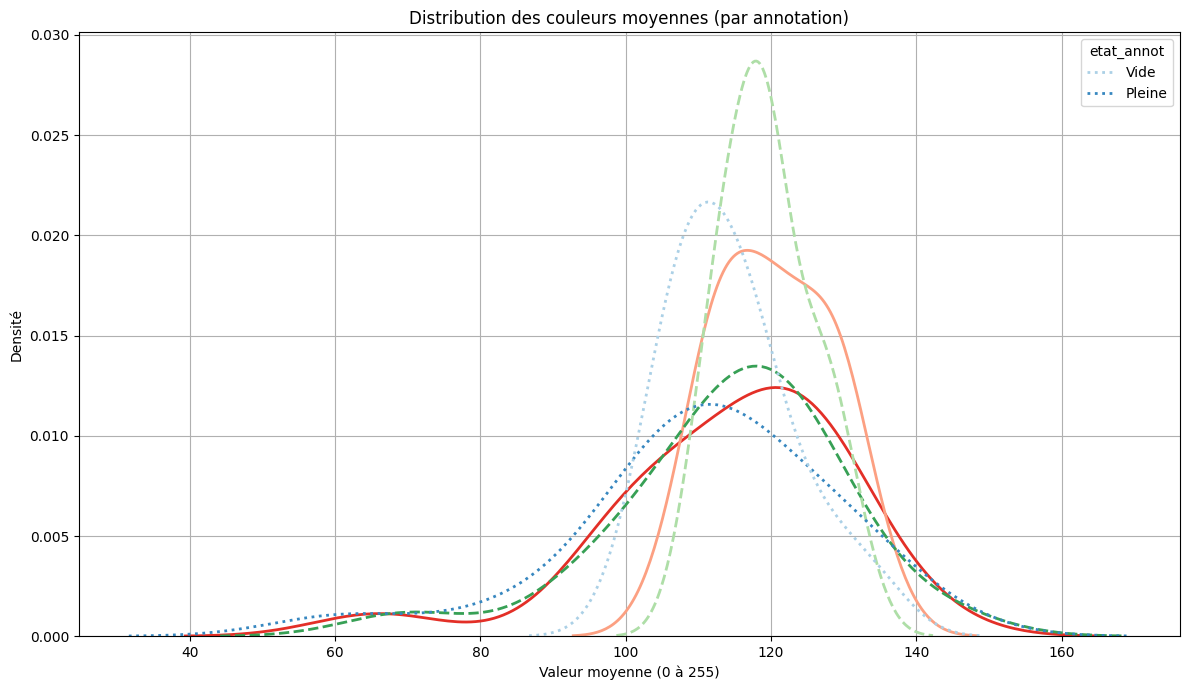

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supprimer les lignes avec valeurs manquantes
df_colors = df.dropna(subset=["moyenne_rouge", "moyenne_vert", "moyenne_bleu", "etat_annot"])

# Plot
plt.figure(figsize=(12, 7))

# Rouge
sns.kdeplot(data=df_colors, x="moyenne_rouge", hue="etat_annot", palette="Reds", lw=2, label="Rouge")
# Vert
sns.kdeplot(data=df_colors, x="moyenne_vert", hue="etat_annot", palette="Greens", lw=2, label="Vert", linestyle="--")
# Bleu
sns.kdeplot(data=df_colors, x="moyenne_bleu", hue="etat_annot", palette="Blues", lw=2, label="Bleu", linestyle=":")

plt.title("Distribution des couleurs moyennes (par annotation)")
plt.xlabel("Valeur moyenne (0 à 255)")
plt.ylabel("Densité")
plt.grid(True)
plt.tight_layout()
plt.show()

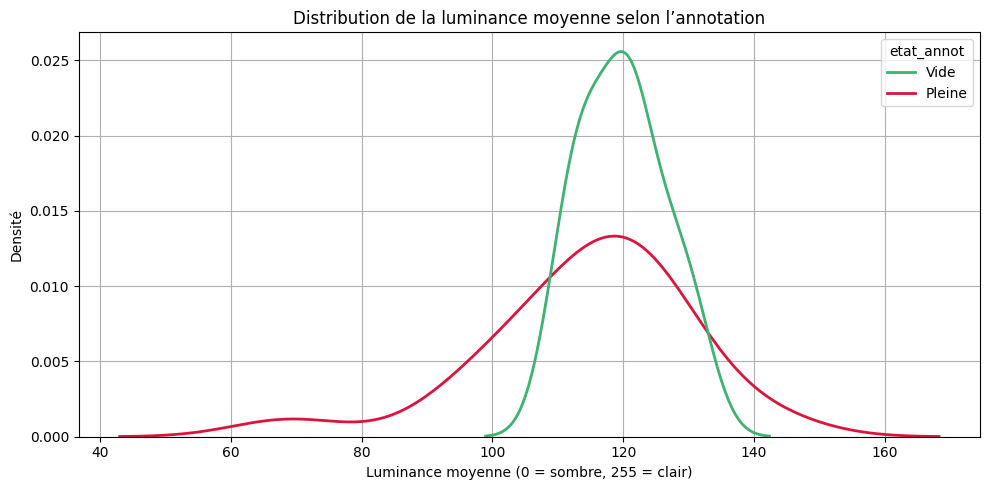

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrage des données valides
df_lumi = df[["luminance_moyenne", "etat_annot"]].dropna()
df_lumi = df_lumi[df_lumi["etat_annot"].isin(["Pleine", "Vide"])]

# Tracé KDE
plt.figure(figsize=(10, 5))
sns.kdeplot(
    data=df_lumi,
    x="luminance_moyenne",
    hue="etat_annot",
    fill=False,
    palette={"Pleine": "crimson", "Vide": "mediumseagreen"},
    linewidth=2
)
plt.title("Distribution de la luminance moyenne selon l’annotation")
plt.xlabel("Luminance moyenne (0 = sombre, 255 = clair)")
plt.ylabel("Densité")
plt.grid(True)
plt.tight_layout()
plt.show()

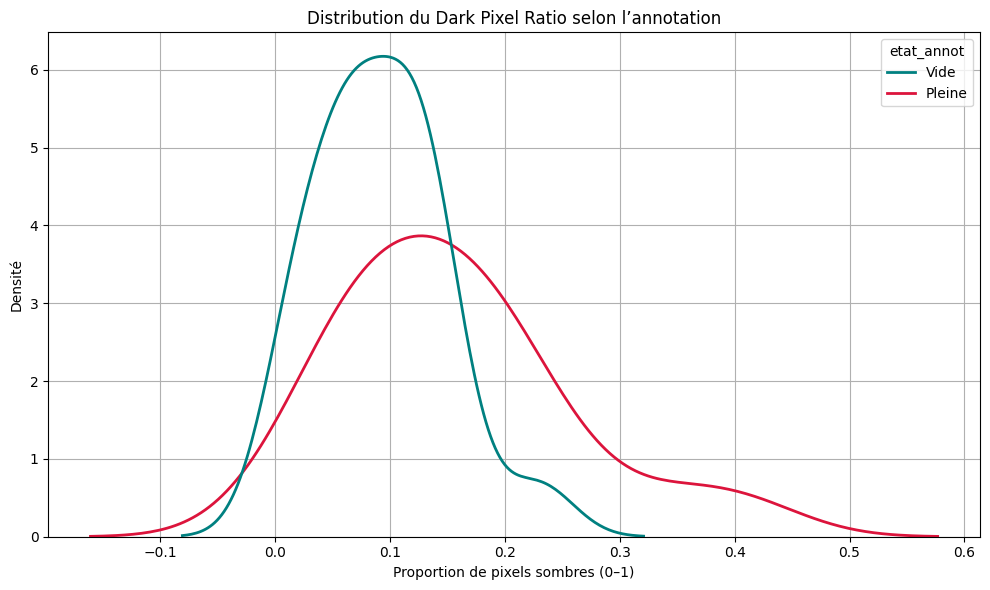

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Nettoyage des données
df_dark = df[["dark_pixel_ratio", "etat_annot"]].dropna()
df_dark = df_dark[df_dark["etat_annot"].isin(["Pleine", "Vide"])]

# Tracé KDE
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df_dark,
    x="dark_pixel_ratio",
    hue="etat_annot",
    fill=False,
    common_norm=False,
    linewidth=2,
    palette={"Pleine": "crimson", "Vide": "teal"}
)
plt.title("Distribution du Dark Pixel Ratio selon l’annotation")
plt.xlabel("Proportion de pixels sombres (0–1)")
plt.ylabel("Densité")
plt.grid(True)
plt.tight_layout()
plt.show()

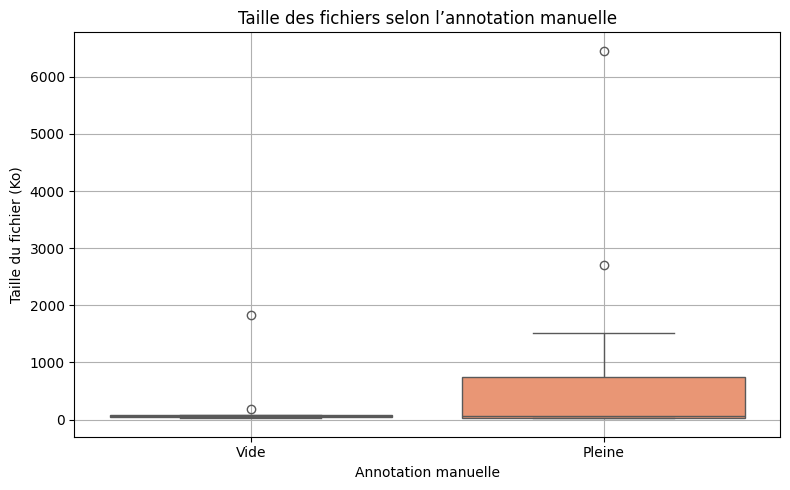

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Conversion de la date si elle existe
if 'date_upload' in df.columns:
    df['date_upload'] = pd.to_datetime(df['date_upload'], errors='coerce')

# Nettoyage des labels pour uniformisation
df['etat_annot'] = df['etat_annot'].replace({'dirty': 'Pleine', 'clean': 'Vide'})
df['classification_auto'] = df['classification_auto'].replace({'dirty': 'Pleine', 'clean': 'Vide'})

# Filtrage des données valides pour l'analyse de taille
df_taille = df[df['etat_annot'].isin(['Pleine', 'Vide']) & df['taille_ko'].notna()]

# Tracé boxplot de la taille des fichiers
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_taille, x='etat_annot', y='taille_ko', hue='etat_annot', palette='Set2')
plt.legend([],[], frameon=False)  # Supprime la légende
plt.title("Taille des fichiers selon l’annotation manuelle")
plt.xlabel("Annotation manuelle")
plt.ylabel("Taille du fichier (Ko)")
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\jkkir\AppData\Local\Temp\ipykernel_37988\3649458676.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_contraste, x="etat_annot", y="contraste", palette="Set2")


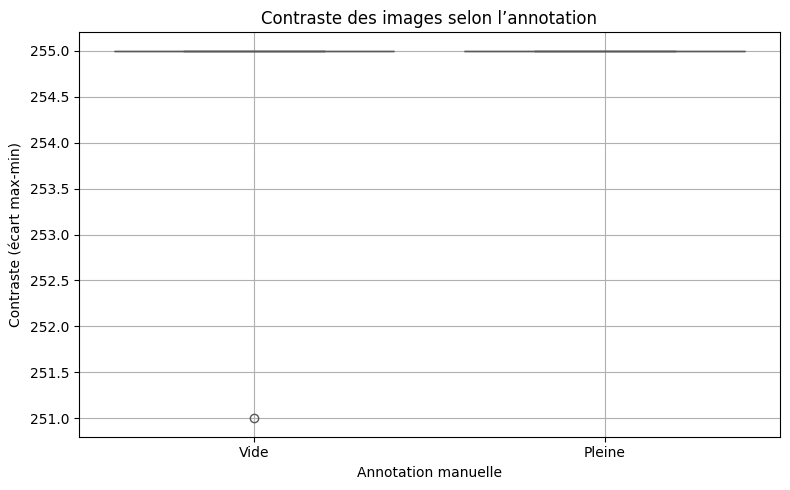

In [19]:
# Filtrer les données valides
df_contraste = df[df["etat_annot"].isin(["Pleine", "Vide"]) & df["contraste"].notna()]

# Tracé boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_contraste, x="etat_annot", y="contraste", palette="Set2")
plt.title("Contraste des images selon l’annotation")
plt.xlabel("Annotation manuelle")
plt.ylabel("Contraste (écart max-min)")
plt.grid(True)
plt.tight_layout()
plt.show()
